# *Predicting Diabetes Using Machine Learning Models on Health Data*

## Khushbakht Zia
## BS Data science 'B'
## Submitted to: Dr. Adnan Amin

# Project Overview: Diabetes Prediction Using Machine Learning
## Objective
The aim of this project is to develop a machine learning-based system that can predict whether a patient is likely to have diabetes based on several health-related input features. This tool can assist healthcare professionals and individuals in early detection and intervention.

## Background
Diabetes is a chronic condition that affects millions worldwide. Early diagnosis can significantly reduce the risks associated with complications. Traditional diagnostic methods require lab testing and physician review, which can be time-consuming and expensive. Machine learning offers a fast, low-cost solution by analyzing patterns in medical data to predict outcomes efficiently.

## What This Project Does
Uses the Pima Indians Diabetes dataset, which includes medical information such as glucose level, blood pressure, BMI, insulin level, and more.

Trains a Logistic Regression model to classify patients into diabetic or non-diabetic.

Provides an easy-to-use interactive interface built with Gradio, allowing users to input health values and receive instant predictions.

Visualizes the dataset and important trends to better understand the data distribution and feature impact.

##Technologies & Tools Used
Python

Pandas, NumPy – for data handling

Scikit-learn – for model building

Gradio – for web-based user interface (works in Google Colab)

Seaborn, Matplotlib – for visualizations (optional section)

##Input Features
Pregnancies

Glucose Level

Blood Pressure

Skin Thickness

Insulin

BMI (Body Mass Index)

Diabetes Pedigree Function

Age

##Output
A simple text output:
✅ No Diabetes or ⚠️ Diabetes Detected, based on the input.

## Install Required Packages

In [ ]:
!pip install streamlit colabcode scikit-learn matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.metrics import accuracy_score, classification_report

## Load and Prepare the Dataset
## Dataset Description
The Pima Indians Diabetes dataset is a well-known medical dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains diagnostic measurements for female patients of Pima Indian heritage aged 21 years or older.

Each record consists of 8 clinical attributes (input features) and 1 target variable (Outcome) indicating whether the patient is diabetic (1) or not (0).

In [ ]:
# 📥 Download dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# 💾 Save CSV file
df.to_csv("diabetes_dataset.csv", index=False)
print("✅ Dataset saved as diabetes_dataset.csv")



✅ Dataset saved as diabetes_dataset.csv


## Download Processed Dataset
This step allows you to download the dataset (diabetes_dataset.csv) to your local machine for offline analysis, backup, or reporting purposes.

In [ ]:
from google.colab import files
files.download("diabetes_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)
## 1. Data Exploration
To understand the structure and quality of the data, we first examined its shape, previewed sample records, generated descriptive statistics, and analyzed class distribution.

### Dataset Shape:
The dataset contains 768 rows and 9 columns, where each row represents a patient and each column is a feature or the outcome.

### First 5 Records:
A snapshot of the dataset helps verify the data types and identify any glaring issues such as unexpected values or formats.

### Statistical Summary:
The describe() function reveals key statistics like mean, standard deviation, min/max, and quartiles for each feature. This helps in identifying outliers and feature scaling needs.

###Class Distribution:

Outcome = 0 (Non-diabetic): Majority class

Outcome = 1 (Diabetic): Minority class
This imbalance indicates the need for careful model evaluation (e.g., using F1-score, not just accuracy).

In [ ]:
# 📊 Exploratory Data Analysis
print("\n📈 Dataset Shape:", df.shape)



📈 Dataset Shape: (768, 9)


In [ ]:
print("\n🔍 First 5 rows:\n", df.head())



🔍 First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("\n📋 Summary Stats:\n", df.describe())



📋 Summary Stats:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

In [ ]:
print("\n⚖️ Class Distribution:\n", df["Outcome"].value_counts())


⚖️ Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


## 2. Data Visualization

## Distribution of Diabetes Outcomes (0 = No Diabetes, 1 = Diabetes)

Shows how many patients have diabetes (1) and how many do not (0), helping to check if the dataset is balanced.

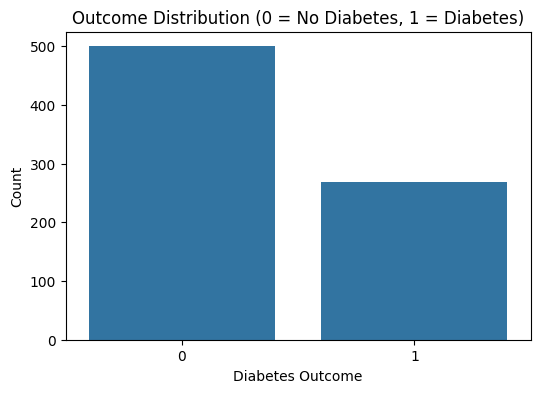

In [ ]:
# Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Outcome Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Count")
plt.show()

## Correlation Heatmap of Features in the Diabetes Dataset

Displays how strongly each feature is related to others and to the diabetes outcome, highlighting important predictors.

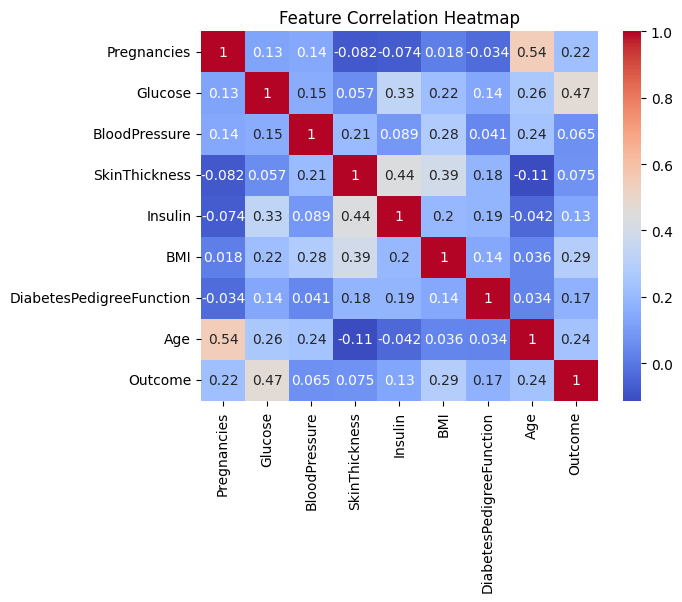

In [ ]:
# 📉 Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Distribution of Features Across All Samples

Shows the distribution and spread of each feature across all patients to understand their ranges and detect skewness.

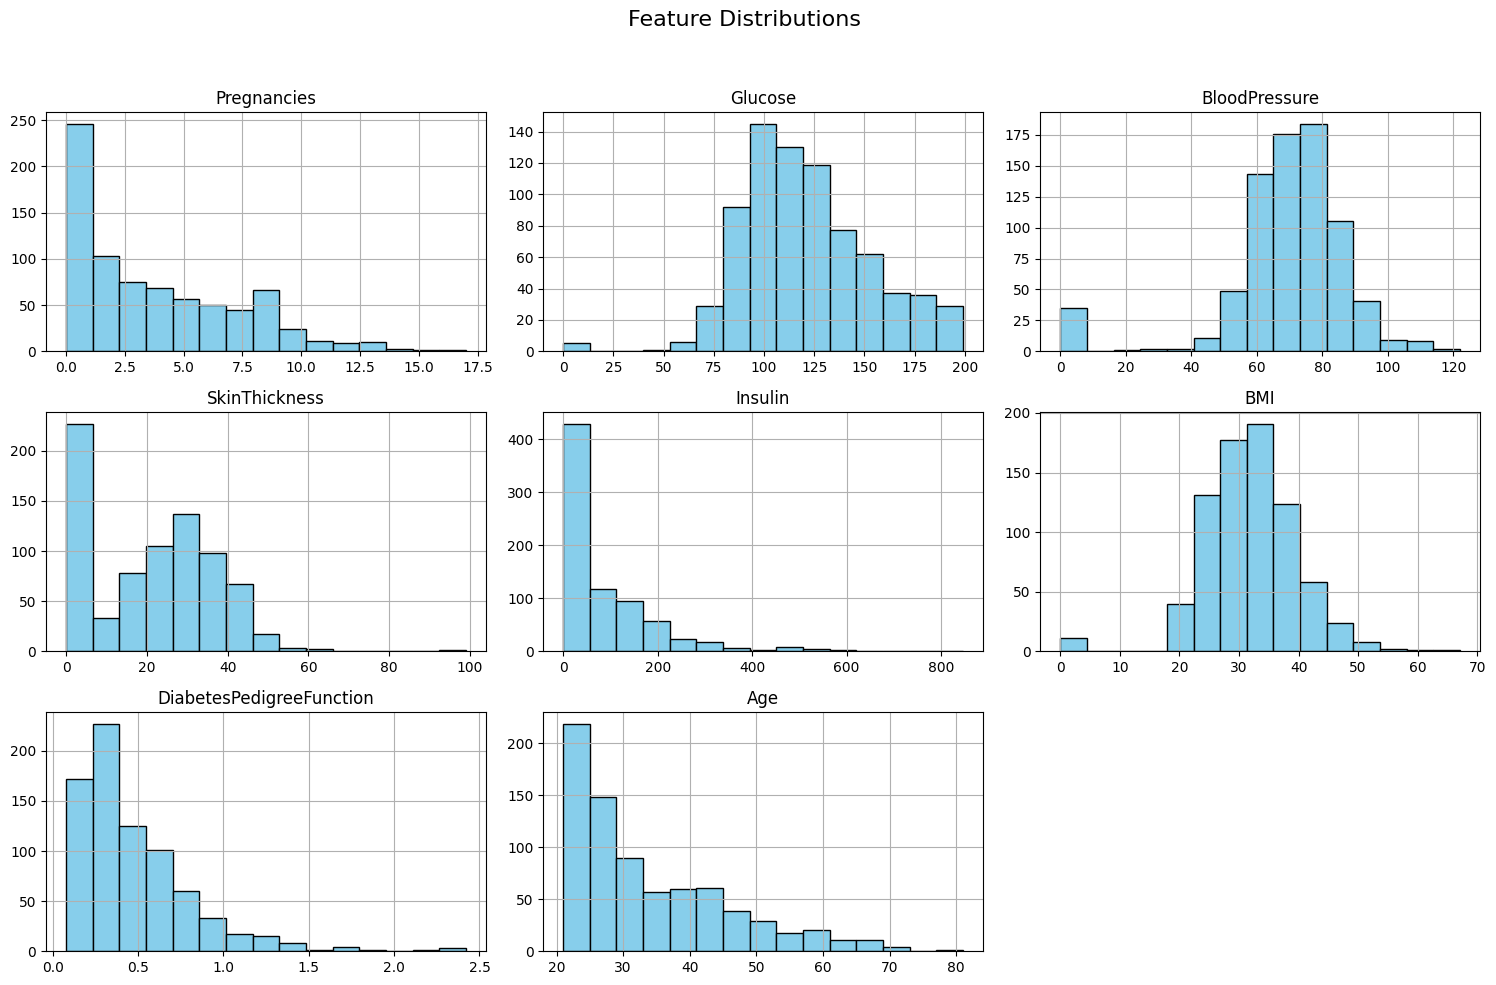

In [ ]:
# Histograms for all features
df[features].hist(bins=15, figsize=(15, 10), layout=(3, 3), color="skyblue", edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Comparison of Feature Values by Diabetes Outcome Using Boxplots

Compares feature values between diabetic and non-diabetic groups to identify features that differ between the two.

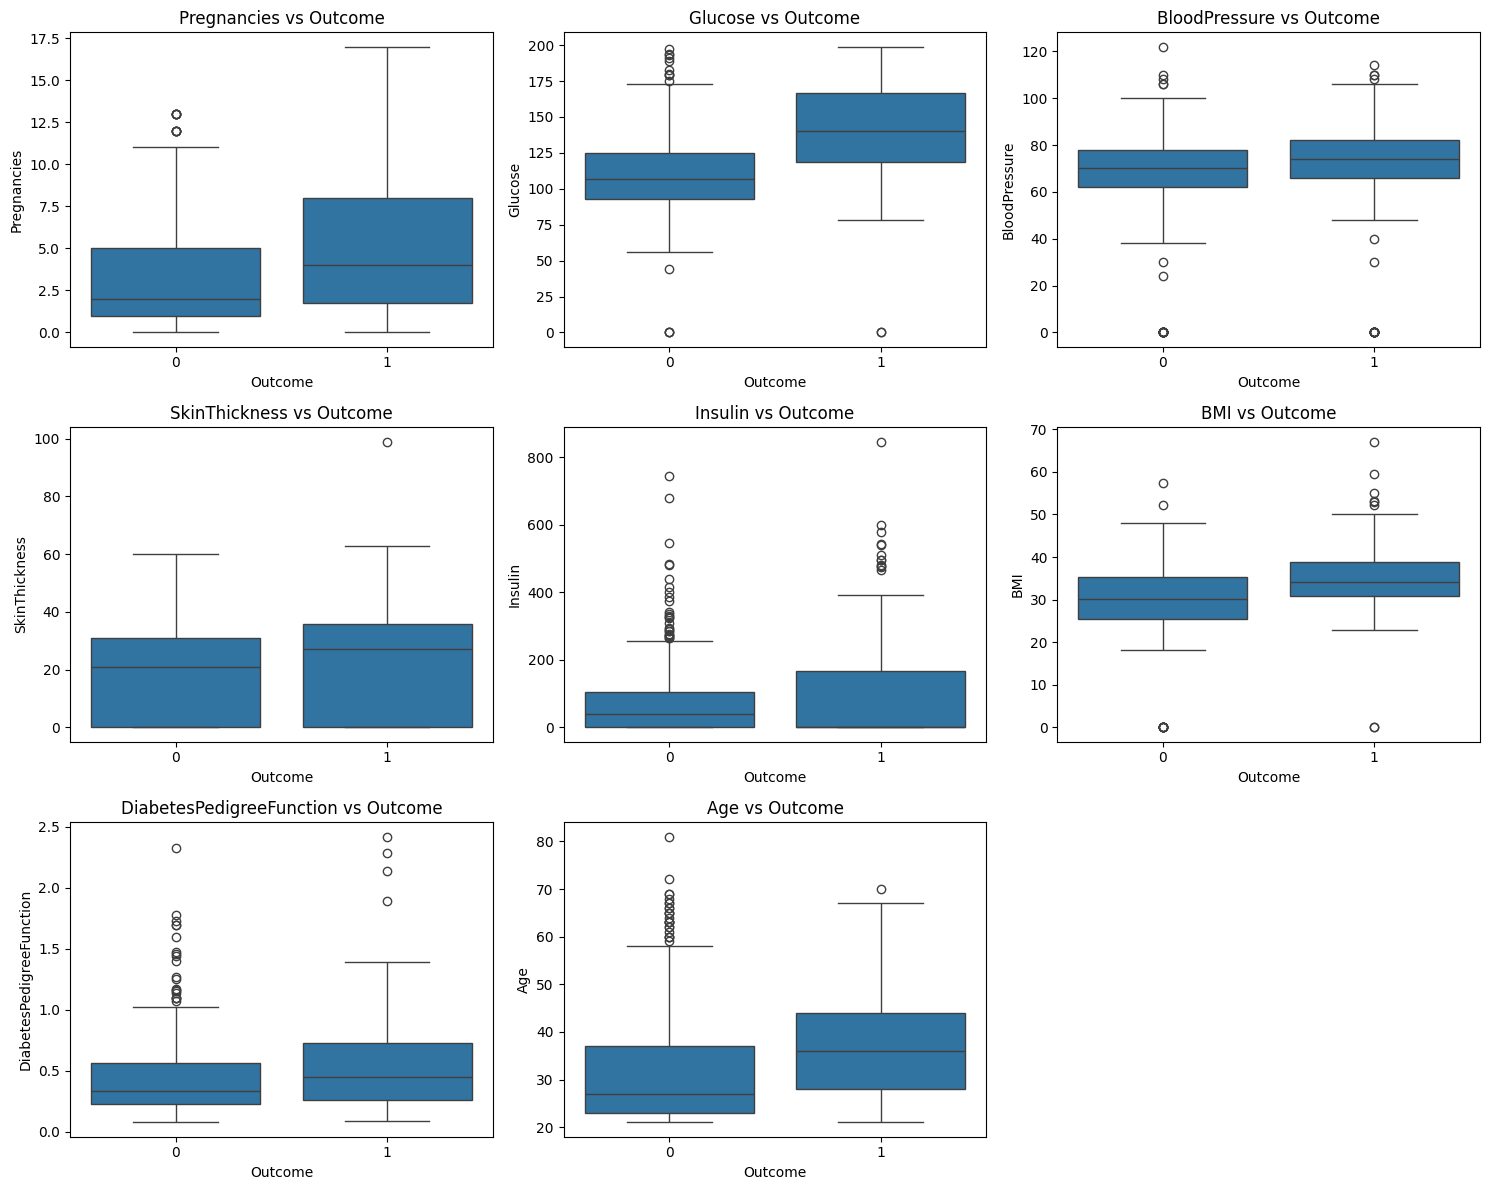

In [ ]:
# Boxplots for each feature grouped by outcome
features = df.columns[:-1]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.title(f"{feature} vs Outcome")
plt.tight_layout()
plt.show()

## Train the Machine Learning Model

## 1. Data Preparation:
The feature matrix X is created by dropping the target column "Outcome" from the dataframe df, while y contains the target variable (diabetes outcome).

## 2. Train-Test Split:
The data is split into training and testing sets using an 80-20 split. This means 80% of the data is used to train the model (X_train, y_train), and 20% is held back for evaluating its performance (X_test, y_test). The random_state=42 ensures reproducibility.

## 3. Model Initialization and Training:
A Logistic Regression model is initialized with a maximum of 1000 iterations to ensure convergence. The model is then trained on the training data using model.fit().

## 4. Prediction:
The trained model predicts diabetes outcomes for the test set (y_pred).

## 5. Performance Evaluation:
The accuracy of the model is calculated by comparing predicted labels (y_pred) against true labels (y_test). Accuracy is the percentage of correct predictions.
Finally, a detailed classification report is printed, showing precision, recall, f1-score, and support for each class, giving deeper insight into the model’s performance.

In [ ]:
# 🧠 Model Training
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Trained: Logistic Regression")
print(f"🎯 Accuracy: {acc * 100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Model Trained: Logistic Regression
🎯 Accuracy: 74.68%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



The Logistic Regression model achieved 74.68% accuracy on the test set. It predicts non-diabetic cases (class 0) better, with higher precision (0.81) and recall (0.79), compared to diabetic cases (class 1), which have lower precision (0.64) and recall (0.67). The F1-score reflects this difference, showing the model is more reliable at detecting non-diabetes than diabetes. Overall, the model performs fairly well but could be improved, especially for the diabetes class.

## App User Interface (UI)
Installing Gradio Library for Building the App User Interface (UI)

In [ ]:
# App UI
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.5 MB/s eta 0:00:00


## Define the Prediction Function

In [ ]:
# Gradio UI
import gradio as gr
# ✅ Define prediction function (this was missing in your code)
def predict_diabetes(preg, glucose, bp, skin, insulin, bmi, dpf, age):
    input_data = np.array([[preg, glucose, bp, skin, insulin, bmi, dpf, age]])
    prediction = model.predict(input_data)[0]
    return "✅ No Diabetes" if prediction == 0 else "⚠️ Diabetes Detected"

## Create the Gradio User Interface

## Inputs:
You define a list of input components using Gradio (gr.Number and gr.Slider) to collect user data for the diabetes prediction model. Each input corresponds to a feature used in the model, such as Pregnancies, Glucose level, Blood Pressure, etc. Default values and ranges are set to guide the user.

## Interface Creation:
gr.Interface creates a simple web-based user interface (UI) for your diabetes prediction function predict_diabetes. It links the input widgets to this function and sets the output as plain text. The interface is also given a title: "🩺 Diabetes Prediction".

##Launching the App:
iface.launch(share=True) starts the web app locally and creates a publicly shareable link (because of share=True). This allows users anywhere to open the app in a browser, input their health data, and get a real-time diabetes risk prediction.

In [ ]:
# 🎛️ Gradio Interface
inputs = [
    gr.Number(label="Pregnancies", value=1),
    gr.Slider(0, 200, value=120, label="Glucose"),
    gr.Slider(0, 122, value=70, label="Blood Pressure"),
    gr.Slider(0, 99, value=20, label="Skin Thickness"),
    gr.Slider(0, 846, value=80, label="Insulin"),
    gr.Slider(0.0, 67.1, value=25.0, label="BMI"),
    gr.Slider(0.0, 2.5, value=0.5, label="Diabetes Pedigree Function"),
    gr.Slider(0, 100, value=30, label="Age"),
]

iface = gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text", title="🩺 Diabetes Prediction")

# 🚀 Launch app
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c27cd8f5d9c76739ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## What the GUI Does
The GUI provides an easy-to-use, interactive form where users input their health parameters related to diabetes risk. Once the user submits the data, the app runs the predict_diabetes function, which likely applies your trained model to predict whether the person is likely to have diabetes or not. The result (prediction) is then displayed as text on the interface, making it accessible even for non-technical users.